In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn
import cv2
from PIL import Image
from tqdm import tqdm

In [3]:
images = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 1\Part 1\Images\images.npy",allow_pickle=True)
masks = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 1\Part 1\Masks\masks.npy",allow_pickle=True)

print(images.shape)
print(masks.shape)

(2656, 256, 256, 3)
(2656, 256, 256, 6)


In [11]:
labels = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 1\Part 1\Images\types.npy")
images = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 1\Part 1\Images\images.npy",allow_pickle=True)
masks = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 1\Part 1\Masks\masks.npy",allow_pickle=True)

print(labels.shape) 
print(images.shape)
print(masks.shape)

(2656,)
(2656, 256, 256, 3)
(2656, 256, 256, 6)


number of 1.Adrenal_gland: 134
number of 2.Bile-duct: 159
number of 3.Bladder: 21
number of 4.Breast: 827
number of 5.Cervix: 155
number of 6.Colon: 478
number of 7.Esophagus: 155
number of 8.HeadNeck: 70
number of 9.Kidney: 37
number of 10.Liver: 65
number of 11.Lung: 80
number of 12.Ovarian: 54
number of 13.Pancreatic: 78
number of 14.Prostate: 77
number of 15.Skin: 59
number of 16.Stomach: 50
number of 17.Testis: 60
number of 18.Thyroid: 80
number of 19.Uterus: 17


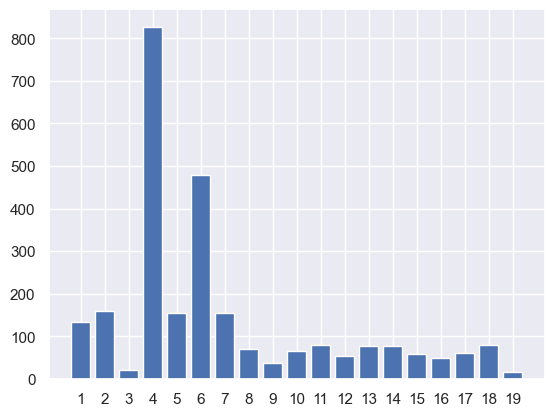

In [12]:
seaborn.set()
classes, counts = np.unique(labels, return_counts=True)

class2integer = {'Adrenal_gland': '1', 'Bile-duct' :'2', 'Bladder': '3', 'Breast': '4',
                 'Cervix': '5', 'Colon': '6', 'Esophagus': '7', 'HeadNeck': '8', 'Kidney': '9',
                 'Liver': '10', 'Lung': '11', 'Ovarian': '12', 'Pancreatic': '13', 'Prostate': '14',
                 'Skin': '15', 'Stomach': '16', 'Testis': '17', 'Thyroid': '18', 'Uterus': '19'}

label_names=['1', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', '11', '12', '13',
             '14', '15', '16', '17', '18', '19']

plt.bar(classes, 
        counts, 
        tick_label=label_names)

for i, idx in enumerate(classes):
    print('number of {}.{}: {}'.format(class2integer[str(idx)], idx, counts[i]))

(2656,)
(2656, 256, 256, 3)
(2656, 256, 256, 6)


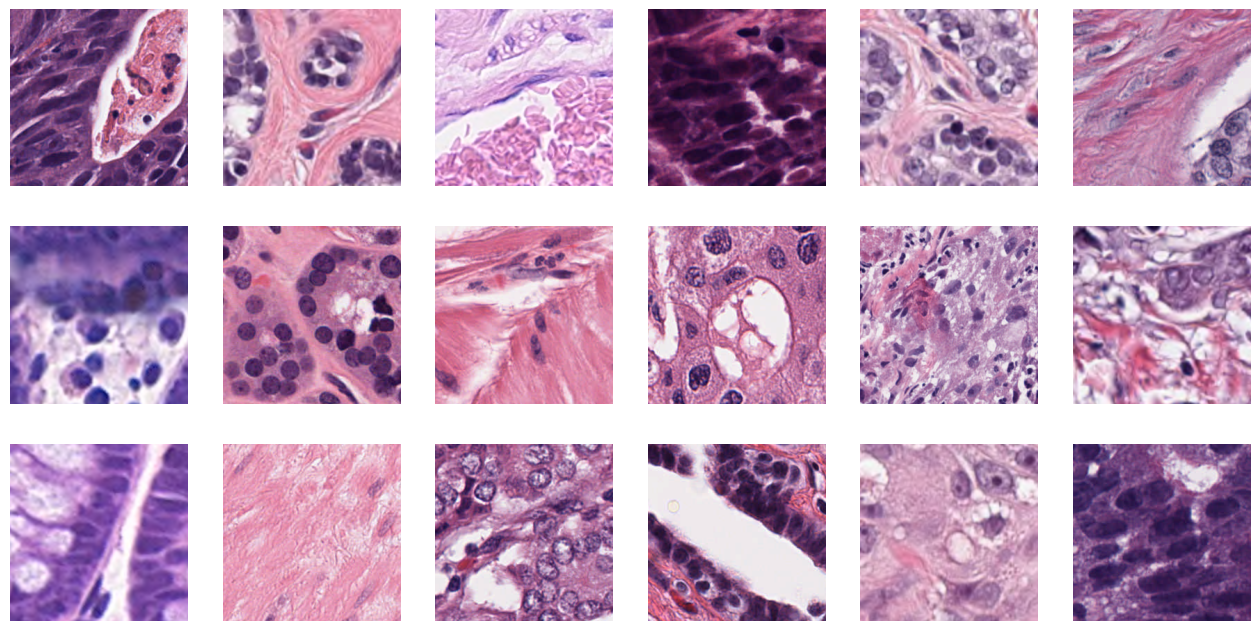

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# labels = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 1\Part 1\Images\types.npy")
# images = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 1\Part 1\Images\images.npy",allow_pickle=True)
# masks = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 1\Part 1\Masks\masks.npy",allow_pickle=True)

print(labels.shape)
print(images.shape)
print(masks.shape)

zeros = np.zeros_like(masks[0, :, :, 0], dtype=bool)
ones = np.ones_like(masks[0, :, :, 0], dtype=bool)

combined_masks = np.zeros_like(masks[0, :, :, 0], dtype=bool)

plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    images_int = images[idx, :, :, :].astype(int)
    plt.imshow(images_int, cmap='bone')
    
   #set black pixel as transparent for the mask
    # combined_masks = masks[idx, :, :, 0] + masks[idx, :, :, 1] + masks[idx, :, :, 2] + \
    #                  masks[idx, :, :, 3] + masks[idx, :, :, 4]
    # mask_bool = np.where(combined_masks > 0., ones, zeros)
    # mask = np.ma.masked_where(mask_bool == False, mask_bool)
    # plt.imshow(mask, alpha=0.7, cmap='gray')
    
    #plt.title(labels[idx])
    plt.axis('off')

In [37]:
labels = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 3\Images\types.npy")
images = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 3\Images\images.npy", allow_pickle=True)
masks = np.load(r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 3\Masks\masks.npy", allow_pickle=True)
print(labels.shape)
print(images.shape)
print(masks.shape)

(2722,)
(2722, 256, 256, 3)
(2722, 256, 256, 6)


In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

zeros = np.zeros_like(masks[0, :, :, 0], dtype=bool)
ones = np.ones_like(masks[0, :, :, 0], dtype=bool)

combined_masks = np.zeros_like(masks[0, :, :, 0], dtype=bool)

# 폴더가 존재하지 않으면 생성
output_folder = r"C:\Users\KDJ\Desktop\KDJ\Code\data\Cancer Instance Segmentation and Classification 3\img"
os.makedirs(output_folder, exist_ok=True)

for i, idx in enumerate(range(images.shape[0]), start=1):
    
    # 마스크 생성
    combined_masks = masks[idx, :, :, 0] + masks[idx, :, :, 1] + masks[idx, :, :, 2] + \
                     masks[idx, :, :, 3] + masks[idx, :, :, 4]
    mask_bool = np.where(combined_masks > 0., ones, zeros)
    mask = np.ma.masked_where(mask_bool == False, mask_bool)
    
    images_int = images[idx, :, :, :].astype(int)
    
    # 이미지 저장
    image = (images_int).astype(np.uint8)
    image_pil = Image.fromarray(image)
    image_path = os.path.join(output_folder, f"image3_{i}.png")
    image_pil.save(image_path)
    
    # 마스크 이미지를 PNG로 저장
    mask_image = (mask * 255).astype(np.uint8)
    mask_image_pil = Image.fromarray(mask_image)
    mask_image_path = os.path.join(output_folder, f"mask3_{i}.png")
    mask_image_pil.save(mask_image_path)

    # 기존 시각화 코드 주석 처리
    # plt.imshow(mask, alpha=0.7, cmap='gray')
    # plt.title(labels[idx])
    # plt.axis('off')


In [ ]:
데이터를 전처리하여 이진화이미지로 변환했다.
1. 2. 합해서 compre data 만들었음.
mask가 이진화가 아니여서 이 코드로 이진화시킴! png 파일로!
데이터를 몇 개 몇 개로 나눠서 각각 train valid 폴더에 저장했다.
이 데이터를 Attention Unet model 이 불러와서 train한다!

폴더구조 넣기

'''

'''

1. 리드미
2. 전처리 코드